# Interactions

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import statsmodels.api as smf
import arviz as az
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

### Easy

##### 7E1

For each of the causal relationships below, name a hypothetical third variable that would lead to an interaction effect.  
1. Bread dough rises because of yeast
2. Education leads to higher income
3. Gasoline makes a car go

**Answer:**  

1. Temperature
2. IQ/Intelligence/Ability
3. Car Weight/ Car Engine size


##### 7E2
Which of the following explanations invokes an interaction?  

1. Caramalizing onions requires cooking over low heat and making sure onions do not dry out.
1. A car will go faster when it has more cylinders or when it has a better fuel injector.
1. Most people acquire their political beliefs from their parents, unless they get them instead from their friends.
1. Intelligent animal species tend to be either highly social or have manipulative appendages (hands, tentacles, etc.)

**Answer:**  
1. Yes. Interaction between heat and onion dry.
1. No. Assumption is that car goes faster because of *either one* of car cyclinders or fuel injector but not a combination of both
1. Yes. Belief is dependent on either parent or friend. The implied model seems to predict individuals’ political beliefs using a linear combination of the interactions between type and parents’ beliefs on the one hand and between type and friends’ beliefs on the other hand.
1. Yes. Intelligence is assumed to depend on being highly social or appendages. It does not assume only one is causing the effect

##### 7E3

For each of the explanations in 7E2, write a linear model that expresses the stated relationship.

**Answer:**  

1. $\text{Onion Caramalized}_i \sim \alpha + \beta_h \text{Heat}_i + \beta_d \text{Is Dry}_i + \beta_{hd} \text{Heat}_i * \text{Is Dry}_i$
1. $\text{Car Speed}_i \sim \alpha + \beta_c \text{N-Cylinders}_i + \beta_f \text{Fuel Injector}_i$
1. $\text{Political Belief}_i \sim \alpha + \beta_p \text{Parent's Political Belief}_i + \beta_f \text{Parent's Political Belief}_i + \beta_{pf} \text{Parent's Political Belief}_i * \text{Friend's Political Belief}_i$
1. $\text{Animal Intelligence}_i \sim \alpha + \beta_h \text{Highly Social}_i + \beta_m \text{Manipulative Appendage}_i + \beta_{hm} \text{Highly Social}_i * \text{Manipulative Appendage}_i$

### Medium

##### 7M1

Recall the tulips example from the chapter. Suppose another set of treatments adjusted the temprature in the greenhouse over two levels: cold and hot. The data in the chapter were collected at the cold temperature. You find none of the plants grown under the hot temperature developed blooms at all, regardless of the water and shade levels. Can you explain this result in terms of interactions between water, shade and temperature?

**Answer:**

The example in the chapter explained the size of blossoms based on the effects of Water (W), Shade (S) and their interaction (WS). The current question implies that a third variables, Temperature (T), also has an effect on the size on the blossom. Additionally, having no blossoms at high temperatures, regardless of water and shade levels implies an interaction effect between W, S, and T. The statement above implies that - no matter the combination of water or shade, high temperatures are bad for blossoms. However, when temperatures are low, varying levels of water and shade can have differing impact on the size of the blossom.

##### 7M2

Can you invent a regression equation that would make the bloom size zero, whenever the temperature is hot?

**Answer:**  

Let us start with the initial equation with only water and shade as effects:  

$\text{Blossom Size} \sim \alpha + \beta_W \text{Water} + \beta_{S} \text{Shade} + \beta_{WS}\text{Water} * \text{Shade}$  

To add a third variable, temperature, the full equation would look as follows:

$$
\begin{align}
\text{Blossom Size} \sim & \alpha + \beta_W \text{Water} + \beta_{S} \text{Shade} + \beta_{WS}\text{Water} * \text{Shade} \\
& + \text{Temperature} * \big(\beta_T + \beta_{WT} \text{Water} + \beta_{ST} \text{Shade} + \beta_{WST}\text{Water} * \text{Shade}\big)
\end{align}
$$  

Let us assume that temperature is encoded as follows:
1. High = 1
1. Low = 0

Therefore, when temperature is low, the interaction term from the temperature disappears and we are left with the original interaction effect between water and shade. However, when temperature is high, we get the following equation:
$$
\begin{align}
\text{Blossom Size} \sim & \alpha + \beta_W \text{Water} + \beta_{S} \text{Shade} + \beta_{WS}\text{Water} * \text{Shade} \\
& + \beta_T + \beta_{WT} \text{Water} + \beta_{ST} \text{Shade} + \beta_{WST}\text{Water} * \text{Shade} \\
\sim & (\alpha + \beta_T) + (\beta_W + \beta_{WT}) * \text{Water} + (\beta_{S} + \beta_{ST}) * \text{Shade} + (\beta_{WS}\text{Water} + \beta_{WST})* \text{Shade} \\
\end{align}
$$  

As we want blossoms to be 0 for high temperatures we want the entire equation to sum to zero. This implies that beta expressions within each brack much sum to zero. That is:  
1. $\alpha = - \beta_T$
1. $\beta_{W} = - \beta_{WT}$
1. $\beta_{S} = - \beta_{ST}$
1. $\beta_{WS} = - \beta_{WST}$

Hence, the equation can be rewritten as:  
$$
\begin{align}
\text{Blossom Size} \sim & \alpha + \beta_W \text{Water} + \beta_{S} \text{Shade} + \beta_{WS}\text{Water} * \text{Shade} \\
& + \text{Temperature} * \big(- \alpha - \beta_{W} \text{Water} - \beta_{S} \text{Shade} - \beta_{WS}\text{Water} * \text{Shade}\big) \\
\sim &\big(1 - Temperature \big) * \big(\alpha + \beta_{W} \text{Water} + \beta_{S} \text{Shade} + \beta_{WS}\text{Water} * \text{Shade}\big)
\end{align}
$$  

This is the equivalent of swapping the encoding of high and low. If we change the encoding (high = 0, low = 1), we get a simplified equation:  
$\text{Blossom Size} \sim Temperature * \big(\alpha + \beta_{W} \text{Water} + \beta_{S} \text{Shade} + \beta_{WS}\text{Water} * \text{Shade}\big)$  

##### 7M3

In parts of North America, ravens depend upon wolves for their food. This is because ravens are carnivorous but cannot usually kill or open carcasses of prey. Wolves however can and do kill and tear open animals, and they tolerate ravens co-feeding at their kills. This specias relationship is generally described as a "species interaction". Can you invent a hypothetical set of data on raven population size in which this relationship would manifest as a satistical interaction? Do you think the biological interaction could be linear? Why or why not?

**Answer:**  
The question suggests that the size of raven population is dependent upon wolf populations and prey populations, along with their interaction. I assume a simple interaction equation:  
$\mu_{\text{Ri}} = \alpha + \beta_W \text{Wolf Pop}_i + \beta_P \text{Prey Pop}_i + \beta_{WP} \text{Wolf Pop}_i * \text{Prey Pop}_i$

In [35]:
# Simulating data
N = 1000
a = 3
beta_w = 2
beta_p = 3
beta_wp = 2.3
corr_w_p = 0.75

prey_p = np.random.normal(loc=0, scale=1, size=N)
wolf_p = np.random.normal(loc=corr_w_p * prey_p, scale=np.sqrt(1 - corr_w_p**2), size=N)
raven_mu = a + beta_w * wolf_p + beta_p * prey_p + beta_wp * wolf_p * prey_p
raven_p = np.random.normal(loc=raven_mu, scale=1, size=N)

In [36]:
# Getting estimates
with pm.Model() as m7_m3:
    a = pm.Normal('alpha', mu=0, sd=100)
    b_w = pm.Normal('beta_w', mu=0, sd=10)
    b_p = pm.Normal('beta_p', mu=0, sd=10)
    b_wp = pm.Normal('beta_wp', mu=0, sd=10)
    raven_mu = pm.Deterministic("mu", a + b_w * wolf_p + b_p * prey_p + b_wp * wolf_p * prey_p)
    sigma = pm.Uniform('sigma', 0, 100)
    raven_pop = pm.Normal("raven_pop", mu=raven_mu, sd=sigma, observed=raven_p)
    trace_m7_m3 = pm.sample(1000, tune=1000)
az.summary(trace_m7_m3, kind="stats", credible_interval=0.89, round_to=2, var_names=["~mu"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta_wp, beta_p, beta_w, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1071.20draws/s]


,mean,sd,hpd_5.5%,hpd_94.5%
alpha,2.98,0.04,2.91,3.03
beta_w,2.00,0.05,1.92,2.07
beta_p,2.99,0.05,2.92,3.07
beta_wp,2.31,0.02,2.27,2.35
sigma,0.99,0.02,0.96,1.02


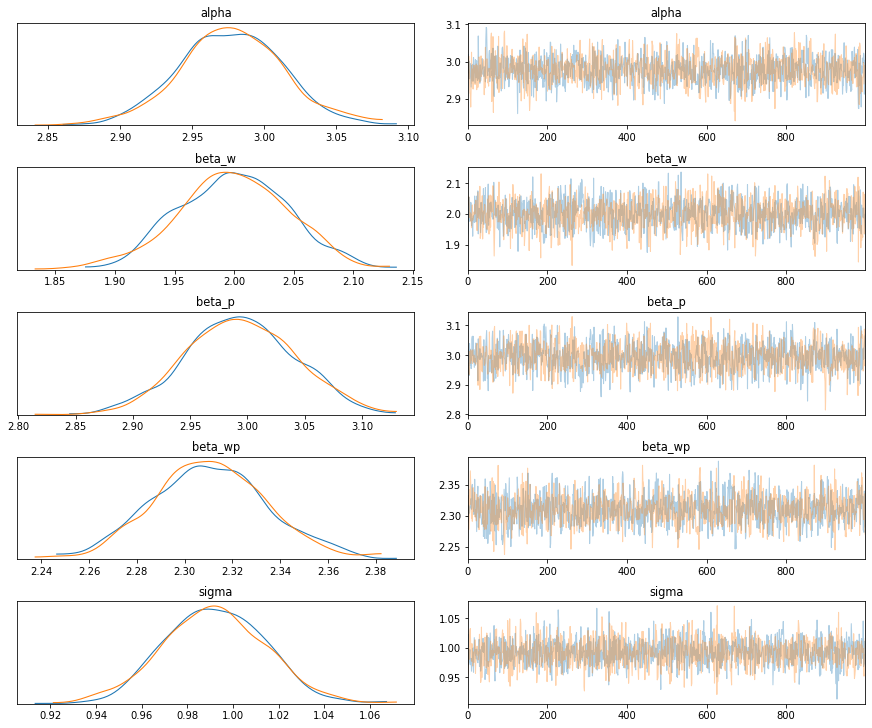

In [37]:
az.plot_trace(trace_m7_m3, var_names=["~mu"]);

In [39]:
df = pm.trace_to_dataframe(trace_m7_m3, varnames=['alpha', 'beta_w', 'beta_p', 'beta_wp'])
df.corr()

,alpha,beta_w,beta_p,beta_wp
alpha,1.000000,-0.053324,0.067423,-0.481985
beta_w,-0.053324,1.000000,-0.733682,0.046413
beta_p,0.067423,-0.733682,1.000000,-0.104319
beta_wp,-0.481985,0.046413,-0.104319,1.000000


From the simulation, we see that the estimates from the regression are close to the true values we have chosen as inputs to the simulated data.

There are issues with assuming a linear interaction between wolf and prey population. 
- Firstly, a linear effect assumes that populations could go negative. This is unlikely to happen.
- Second, given that wolves hunt in packs, there is bound to be an upper limit to the size of wolf population before the pack splits. The newly formed wolf pack would have to move to another territory. This could imply that the trend is also capped at some upper limit for wolf populations.
- It is also unlikely for the prey population to increase infinitely.

### Hard

##### 7H1

Return to the `data(tulips)` example in the chapter. Now include the `bed` variable as a predictor in the interaction model. Don't interact `bed` with othe other predictors; just include it as a main effect. Not the `bed` is categorical. So to use it properly, you willl need to either construct dummy variables or rather an index variable, as explained in Chapter 6.

In [46]:
d = pd.read_csv("../../data/tulips.csv", sep=";")
d = pd.get_dummies(d, columns=["bed"])
d['shade_c'] = d.shade - d.shade.mean()
d['water_c'] = d.water - d.water.mean()

with pm.Model() as m7_h1:
    a = pm.Normal("alpha", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=6)
    sigma = pm.Uniform("sd", 0, 100)
    mu = pm.Deterministic("mu", a + b[0] * d.water_c + b[1] * d.shade_c + b[2] * d.water_c * d.shade_c + b[3] * d.bed_a + b[4] * d.bed_b + b[5] * d.bed_c)
    bloom = pm.Normal("bloom", mu=mu, sd=sigma, observed=d.blooms)
    trace_m7_h1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, bW, alpha]
Sampling 2 chains, 1 divergences: 100%|██████████| 4000/4000 [00:07<00:00, 531.17draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


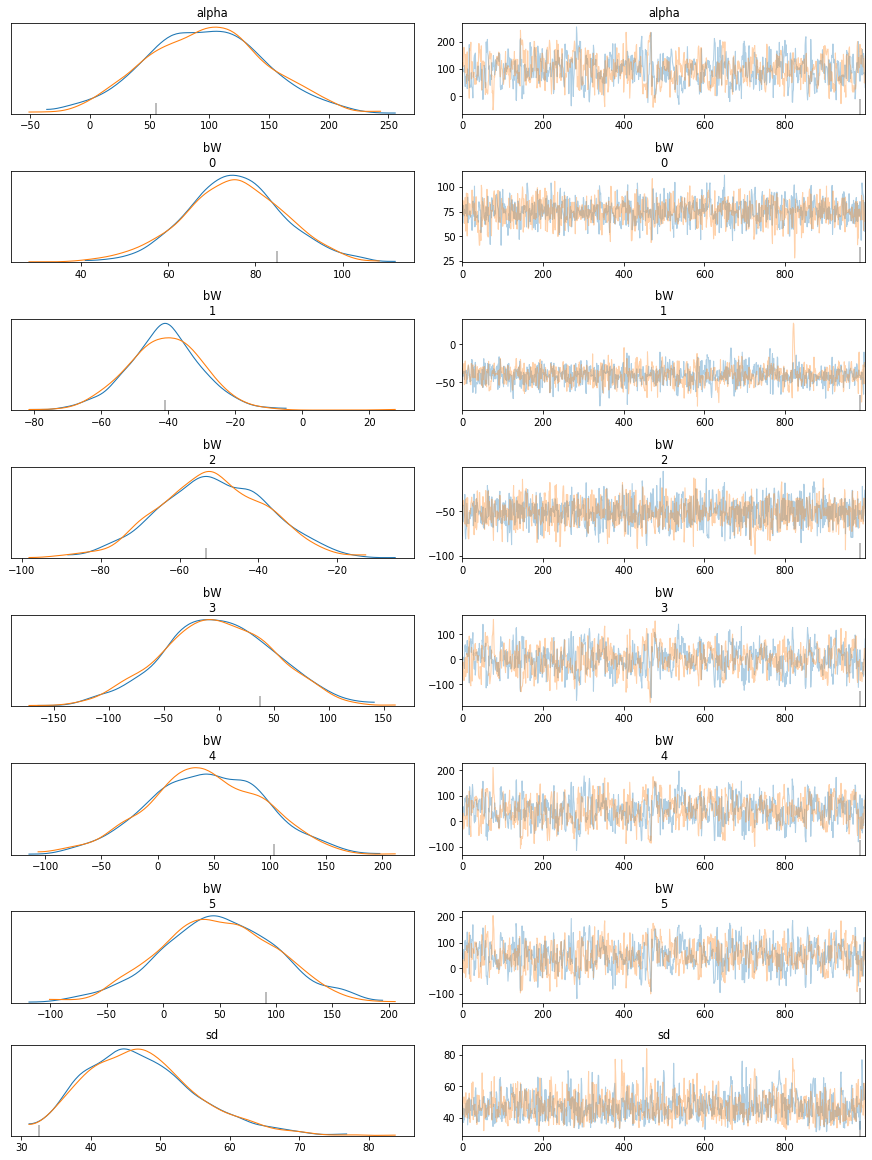

In [49]:
az.plot_trace(trace_m7_h1, var_names=["~mu"]);

In [50]:
az.summary(trace_m7_h1, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
alpha,97.32,49.26,18.85,176.73
bW[0],75.06,11.20,57.46,93.31
bW[1],-40.86,11.28,-57.09,-21.97
bW[2],-51.38,13.61,-71.93,-28.89
bW[3],-0.61,50.62,-77.32,85.72
bW[4],43.38,50.49,-36.19,124.90
bW[5],48.78,50.77,-32.60,129.47
sd,47.36,7.93,34.68,58.92


##### 7H2

Use WAIC to compare the model from **7H1** to a model that omits `bed`. What do you infer from this comparison? Can you reconcile the WAIC results with the posterios distribution of the `bed` coefficients?

In [51]:
with pm.Model() as m7_h2:
    a = pm.Normal("alpha", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=3)
    sigma = pm.Uniform("sd", 0, 100)
    mu = pm.Deterministic("mu", a + b[0] * d.water_c + b[1] * d.shade_c + b[2] * d.water_c * d.shade_c)
    bloom = pm.Normal("bloom", mu=mu, sd=sigma, observed=d.blooms)
    trace_m7_h2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1289.83draws/s]


In [53]:
az.summary(trace_m7_h2, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
alpha,127.71,10.00,112.71,143.19
b[0],74.82,12.46,56.99,95.04
b[1],-40.99,11.93,-61.20,-23.28
b[2],-51.85,15.29,-75.22,-28.99
sd,51.96,8.71,38.80,64.77


In [52]:
compare_df = az.compare({
    "m7_bed": trace_m7_h1,
    "m7_no_bed": trace_m7_h2,
})
compare_df

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m7_bed,0,290.245,5.96395,0,0.706303,6.18126,0,True,deviance
m7_no_bed,1,293.5,4.5117,3.25493,0.293697,7.06612,5.60079,True,deviance


##### 7H3

Consider again the `data(rugged)` data on economic development and terrain ruggedness, examined in this chapter. One of the African conuntries in that example, Seychelles, is far outside the cloud of other nations, being a rare country with both relatively high GDP and high ruggedness. Seychelles is also unusual, in that it is a group of islands far from the coast of mainland Africa, and its main economic activity is tourism.  

One might suspect that this one nation is exerting a strong influence on the conclusions. In this problem, I want you to drop Seychelles from the data and re-evaluate the hypothesis that relationship of African economies with ruggedness is different from that on other continents.  

In [65]:
d = pd.read_csv("../../data/rugged.csv", sep=";")
d["log_gdp"] = np.log(d["rgdppc_2000"])
d = d.dropna(subset=["rgdppc_2000"])

dd = d[~(d.country == "Seychelles")]
d.head()

,isocode,isonum,country,rugged,rugged_popw,rugged_slope,rugged_lsd,rugged_pc,land_area,lat,...,africa_region_e,africa_region_c,slave_exports,dist_slavemkt_atlantic,dist_slavemkt_indian,dist_slavemkt_saharan,dist_slavemkt_redsea,pop_1400,european_descent,log_gdp
2,AGO,24,Angola,0.858,0.714,2.274,0.228,4.906,124670.0,-12.299,...,0,1,3610000.0,5.669,6.981,4.926,3.872,1223208.0,2.000,7.492609
4,ALB,8,Albania,3.427,1.597,10.451,1.006,62.133,2740.0,41.143,...,0,0,0.0,NaN,NaN,NaN,NaN,200000.0,100.000,8.216929
7,ARE,784,United Arab Emirates,0.769,0.316,2.112,0.191,6.142,8360.0,23.913,...,0,0,0.0,NaN,NaN,NaN,NaN,19200.0,0.000,9.933263
8,ARG,32,Argentina,0.775,0.220,2.268,0.226,9.407,273669.0,-35.396,...,0,0,0.0,NaN,NaN,NaN,NaN,276632.0,89.889,9.407032
9,ARM,51,Armenia,2.688,0.934,8.178,0.799,50.556,2820.0,40.294,...,0,0,0.0,NaN,NaN,NaN,NaN,105743.0,0.500,7.792343


1. Begin by using `map` to fit just the interaction model:  
$$
\begin{align}
y_i &\sim \text{Normal($\mu_i$, $\sigma$)} \\
\mu_i &= \alpha + \beta_AA_i + \beta_RR_i + \beta_{AR}AR_i
\end{align}
$$  
where *y* is log GDP per capita in the year 2000 (log of `rgdppc_2000`); *A* is `cont_africa`, the dummy variable for being an African nation; and *R* is the variable `rugged`. Choose your own priors. Compare the inference from this model fit to the data without Seychelles to the same model fit to the full data. Does it seem like the effect of ruggedness depends upon continent? How much has the expected relationship changed?

In [66]:
with pm.Model() as m7_h3a:
    a = pm.Normal("alpha", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=3)
    mu = pm.Deterministic("mu", a + b[0] * d.cont_africa + b[1] * d.rugged + b[2] * d.cont_africa * d.rugged)
    sigma = pm.Uniform("sigma", 0, 100)
    lgdp = pm.Normal("lgdp", mu=mu, sd=sigma, observed=d.log_gdp)
    trace_m7_h3a = pm.sample(1000, tune=1000)
    
with pm.Model() as m7_h3b:
    a = pm.Normal("alpha", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=3)
    mu = pm.Deterministic("mu", a + b[0] * dd.cont_africa + b[1] * dd.rugged + b[2] * dd.cont_africa * dd.rugged)
    sigma = pm.Uniform("sigma", 0, 100)
    lgdp = pm.Normal("lgdp", mu=mu, sd=sigma, observed=dd.log_gdp)
    trace_m7_h3b = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1009.78draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:04<00:00, 995.47draws/s] 


In [67]:
az.summary(trace_m7_h3a, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
alpha,9.23,0.13,9.00,9.43
b[0],-1.96,0.22,-2.33,-1.64
b[1],-0.21,0.07,-0.32,-0.08
b[2],0.40,0.13,0.21,0.61
sigma,0.95,0.05,0.87,1.04


In [68]:
az.summary(trace_m7_h3b, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
alpha,9.23,0.14,9.00,9.44
b[0],-1.89,0.24,-2.28,-1.53
b[1],-0.20,0.08,-0.32,-0.07
b[2],0.31,0.14,0.06,0.52
sigma,0.94,0.05,0.86,1.03


2. Now plot the predictions of the interaction model, with and without Seychelles. Does it still seem like the effect of ruggedness depends upon continent? How much has the expected relationship changed?  

In [104]:
rugged_seq = np.arange(-1, 8, 0.25)

# Predictions with Seychelles

mu_pred_NotAfrica_s = trace_m7_h3a['alpha'] + trace_m7_h3a['b'][:,0] * 0 + trace_m7_h3a['b'][:,1] * rugged_seq[:, None] + trace_m7_h3a['b'][:,2] * 0 * rugged_seq[:, None]
mu_pred_Africa_s = trace_m7_h3a['alpha'] + trace_m7_h3a['b'][:,0] * 1 + trace_m7_h3a['b'][:,1] * rugged_seq[:, None] + trace_m7_h3a['b'][:,2] * 1 * rugged_seq[:, None]

In [106]:
# Predictions without Seychelles
mu_pred_NotAfrica_ws = trace_m7_h3b['alpha'] + trace_m7_h3b['b'][:,0] * 0 + trace_m7_h3b['b'][:,1] * rugged_seq[:, None] + trace_m7_h3b['b'][:,2] * 0 * rugged_seq[:, None]
mu_pred_Africa_ws = trace_m7_h3b['alpha'] + trace_m7_h3b['b'][:,0] * 1 + trace_m7_h3b['b'][:,1] * rugged_seq[:, None] + trace_m7_h3b['b'][:,2] * 1 * rugged_seq[:, None]

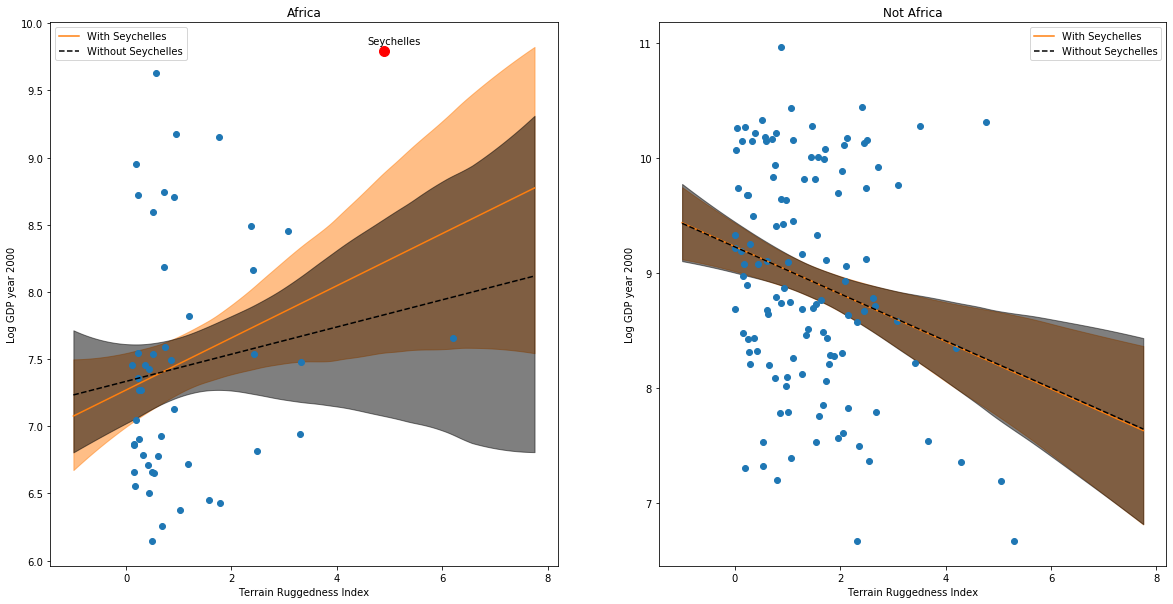

In [177]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("Africa")
ax1.set_xlabel("Terrain Ruggedness Index")
ax1.set_ylabel("Log GDP year 2000")
ax1.plot(d.loc[d.cont_africa == 1,"rugged"], d.loc[d.cont_africa == 1,"log_gdp"], 'C0o')
ax1.plot(d.loc[d.country == "Seychelles","rugged"], d.loc[d.country == "Seychelles","log_gdp"], 'ro', markersize=10)
ax1.annotate("Seychelles", (d.loc[d.country == "Seychelles","rugged"] - 0.3, d.loc[d.country == "Seychelles","log_gdp"] + 0.05))
az.plot_hpd(rugged_seq, mu_pred_Africa_s.T, credible_interval=0.89, ax=ax1)
az.plot_hpd(rugged_seq, mu_pred_Africa_ws.T, color="k", credible_interval=0.89, ax=ax1)
ax1.plot(rugged_seq, mu_pred_Africa_s.mean(1), "C1", label="With Seychelles")
ax1.plot(rugged_seq, mu_pred_Africa_ws.mean(1), "k--", label="Without Seychelles")
ax1.legend()

ax2.set_title("Not Africa")
ax2.set_xlabel("Terrain Ruggedness Index")
ax2.set_ylabel("Log GDP year 2000")
ax2.plot(d.loc[d.cont_africa != 1,"rugged"], d.loc[d.cont_africa != 1,"log_gdp"], 'C0o')
az.plot_hpd(rugged_seq, mu_pred_NotAfrica_s.T, credible_interval=0.89, ax=ax2)
az.plot_hpd(rugged_seq, mu_pred_NotAfrica_ws.T, color="k", credible_interval=0.89, ax=ax2)
ax2.plot(rugged_seq, mu_pred_NotAfrica_s.mean(1), "C1", label="With Seychelles")
ax2.plot(rugged_seq, mu_pred_NotAfrica_ws.mean(1), "k--", label="Without Seychelles")
ax2.legend();

3. Finally, conduct a model comparison analysis, using WAIC. Fit three models to the data without Seychelles:  

$$
\begin{align}
\text{Model 1}: y_i &\sim \text{Normal($\mu_i$, $\sigma$)} \\
\mu_i &= \alpha + \beta_RR_i\\
\text{Model 2}: y_i &\sim \text{Normal($\mu_i$, $\sigma$)} \\
\mu_i &= \alpha + \beta_AA_i + \beta_RR_i \\
\text{Model 3}: y_i &\sim \text{Normal($\mu_i$, $\sigma$)} \\
\mu_i &= \alpha + \beta_AA_i + \beta_RR_i + \beta_{AR}AR_i
\end{align}
$$

Use whatever priors you think are sensible. Plot the model-averaged predictions of this model set.  Do your inferences differ from those in (b)? Why or why not?

In [69]:
with pm.Model() as m7_h3c:
    a = pm.Normal("alpha", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100)
    mu = pm.Deterministic("mu", a + b * dd.rugged)
    sigma = pm.Uniform("sigma", 0, 100)
    lgdp = pm.Normal("lgdp", mu=mu, sd=sigma, observed=dd.log_gdp)
    trace_m7_h3c = pm.sample(1000, tune=1000)
    
with pm.Model() as m7_h3d:
    a = pm.Normal("alpha", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=2)
    mu = pm.Deterministic("mu", a + b[0] * dd.cont_africa + b[1] * dd.rugged)
    sigma = pm.Uniform("sigma", 0, 100)
    lgdp = pm.Normal("lgdp", mu=mu, sd=sigma, observed=dd.log_gdp)
    trace_m7_h3d = pm.sample(1000, tune=1000)
    
with pm.Model() as m7_h3e:
    a = pm.Normal("alpha", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=3)
    mu = pm.Deterministic("mu", a + b[0] * dd.cont_africa + b[1] * dd.rugged + b[2] * dd.cont_africa * dd.rugged)
    sigma = pm.Uniform("sigma", 0, 100)
    lgdp = pm.Normal("lgdp", mu=mu, sd=sigma, observed=dd.log_gdp)
    trace_m7_h3e = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1667.18draws/s]
The acceptance probability does not match the target. It is 0.8805924690729643, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1323.50draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:03<00:00, 1064.76draws/s]


In [70]:
compare_df = az.compare({
    "m7_3_R": trace_m7_h3c,
    "m7_3_A_R": trace_m7_h3d,
    "m7_3_A_R_AR": trace_m7_h3e,
})
compare_df

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m7_3_A_R_AR,0,463.521,4.58783,0,0.717448,13.0638,0,True,deviance
m7_3_A_R,1,466.356,3.94846,2.83434,0.282552,14.0225,3.60891,False,deviance
m7_3_R,2,535.952,2.50549,72.4303,8.82373e-09,15.0059,15.3347,False,deviance


##### 7H4

The values in `data(nettle)` are data on language diversity in 74 nations. The meaning of each column is given below.   

1. `country`: Name of the country.
1. `num.lang`: Number of recognized languages spoken.
1. `area`: Area in square kilometers.
1. `k.pop`: Population, in thousands.
1. `num.stations`: Number of weather stations that provided data for the next two columns.
1. `mean.growing.season`: Average length of growing season, in months
1. `sd.growing.season`: Standard deviation of length of growing season, in months.


Use these data to evaluate the hypothesis that language diversity is partly a product of food security . The notion is that, in productive ecologies, people don't need large social networks to buffer them against risk of food shortfalls. This means that ethnic groups can be smaller and more self-sufficient, leading to more languages per-capita. In contrast, in a poor ecology, there is a subsistence risk, and so human societies have adapted by building larger networks of mutual obligation to provide food insurance. This in turn creates social forces that help prevent languages from diversifying.  

Specifically, you will try to model the number of languages per capita as the outcome variable:  
```
d$lang.per.cap  <- d$num.lang / d$k.pop
```  

Use the logarithm of this new variable as your regression outcome. (A count model would be better here, but you'll learn those later, in chapter 10.)  

This problem is open ended, allowing you to decide how you address the hypothesis and the uncertain advice the modeling provides. If you think you need to use WAIC any place, please do. If you think you need certain priors, argue for them. If you think you need to plot predictions in a certain way, please do. Just try to honestly evaluate the main effects of both `mean.growing.season` and `sd.growing.season`, as well as their two-way interaction. as outlined in parts (b), (b), and (c) below. If you are not sure which approach to use, try several.  

In [182]:
d = pd.read_csv("../../data/nettle.csv", sep=";")
d["lang_per_cap"] = d["num.lang"] / d["k.pop"]
d["log_lang_per_cap"] = np.log(d["lang_per_cap"])
d["num_stations_c"] = d["num.stations"] - d["num.stations"].mean()
d.head()

,country,num.lang,area,k.pop,num.stations,mean.growing.season,sd.growing.season,lang_per_cap,log_lang_per_cap,num_stations_c
0,Algeria,18,2381741,25660,102,6.60,2.29,0.000701,-7.262317,64.094595
1,Angola,42,1246700,10303,50,6.22,1.87,0.004076,-5.502521,12.094595
2,Australia,234,7713364,17336,134,6.00,4.17,0.013498,-4.305219,96.094595
3,Bangladesh,37,143998,118745,20,7.40,0.73,0.000312,-8.073816,-17.905405
4,Benin,52,112622,4889,7,7.14,0.99,0.010636,-4.543499,-30.905405


1. Evaluate the hypothesis that language diversity, as measured by `log(lang.per.cap)`, is positively associated with the average length of the growing season, `mean.growing.season`. Consider `log(area)` in your regression(s) as a covariate (not an interaction). Interpret your results.

In [183]:
# Only mean.growing.season as feature
with pm.Model() as m7_h4a:
    a = pm.Normal("a", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100)
    mu = pm.Deterministic("mu", a + b * d["mean.growing.season"])
    sigma = pm.Uniform("sd", 0, 100)
    llang = pm.Normal("log(lang.per.cap)", mu=mu, sd=sigma, observed=d["log_lang_per_cap"])
    trace_m7_h4a = pm.sample(1000, tune=1000)

# Adding area
with pm.Model() as m7_h4b:
    a = pm.Normal("a", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=2)
    mu = pm.Deterministic("mu", a + b[0] * d["mean.growing.season"] + b[1] * np.log(d["area"]))
    sigma = pm.Uniform("sd", 0, 100)
    llang = pm.Normal("log(lang.per.cap)", mu=mu, sd=sigma, observed=d["log_lang_per_cap"])
    trace_m7_h4b = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:04<00:00, 957.31draws/s] 
The acceptance probability does not match the target. It is 0.884380184395541, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:12<00:00, 320.95draws/s]


In [185]:
az.summary(trace_m7_h4a, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
a,-6.69,0.43,-7.35,-6.02
b,0.17,0.06,0.09,0.26
sd,1.46,0.13,1.25,1.65


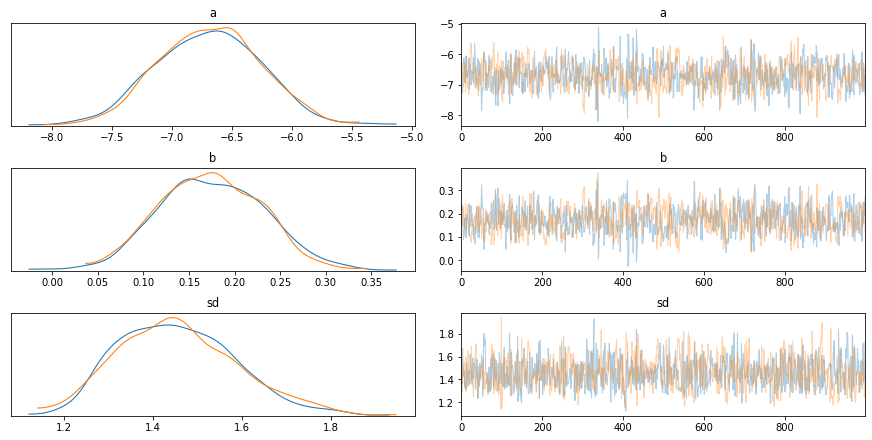

In [188]:
az.plot_trace(trace_m7_h4a, var_names=["~mu"]);

In [189]:
az.summary(trace_m7_h4b, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
a,-3.91,2.11,-7.05,-0.39
b[0],0.14,0.06,0.05,0.24
b[1],-0.20,0.15,-0.46,0.01
sd,1.44,0.13,1.23,1.63


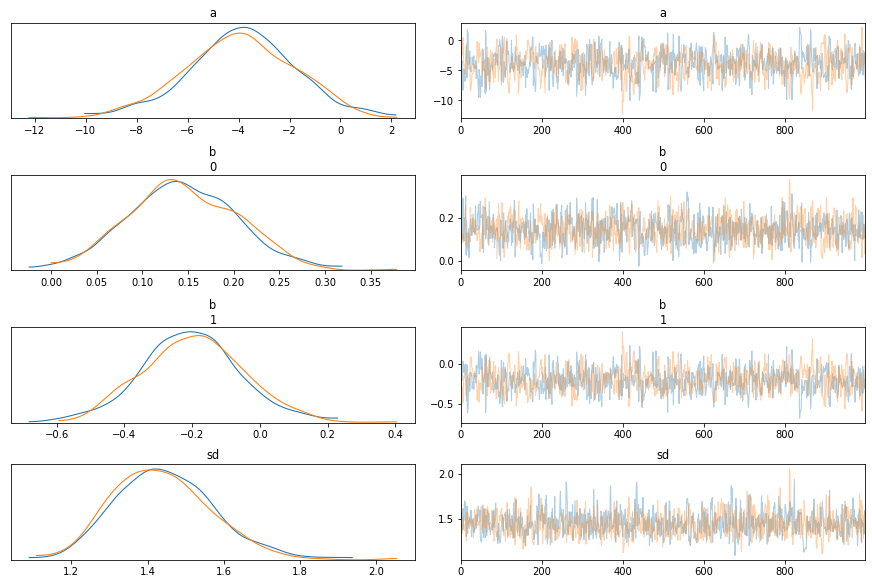

In [190]:
az.plot_trace(trace_m7_h4b, var_names=["~mu"]);

In [184]:
compare_df = az.compare({
    "m7_h4a": trace_m7_h4a,
    "m7_h4b": trace_m7_h4b,
})
compare_df

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m7_h4a,0,267.856,3.49495,0,0.516369,14.1827,0,True,deviance
m7_h4b,1,267.94,4.61638,0.0846481,0.483631,14.6169,3.28576,True,deviance


2. Now evaluate the hypothesis that language diversity is negatively associated with the standard deviation of length of growing season, `sd.growing.season`. The hypothesis follows from uncertainty in harvest favoring social insurance through larger social networks and therefore fewer languages. Again, consider `log(area)` as a covariate (not an interaction). Interpret your results.  

In [191]:
# Only mean.growing.season as feature
with pm.Model() as m7_h4c:
    a = pm.Normal("a", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100)
    mu = pm.Deterministic("mu", a + b * d["sd.growing.season"])
    sigma = pm.Uniform("sd", 0, 100)
    llang = pm.Normal("log(lang.per.cap)", mu=mu, sd=sigma, observed=d["log_lang_per_cap"])
    trace_m7_h4c = pm.sample(1000, tune=1000)

# Adding area
with pm.Model() as m7_h4d:
    a = pm.Normal("a", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=2)
    mu = pm.Deterministic("mu", a + b[0] * d["sd.growing.season"] + b[1] * np.log(d["area"]))
    sigma = pm.Uniform("sd", 0, 100)
    llang = pm.Normal("log(lang.per.cap)", mu=mu, sd=sigma, observed=d["log_lang_per_cap"])
    trace_m7_h4d = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1344.30draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:12<00:00, 316.92draws/s]
The acceptance probability does not match the target. It is 0.8993350051603279, but should be close to 0.8. Try to increase the number of tuning steps.


In [192]:
az.summary(trace_m7_h4c, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
a,-4.87,0.34,-5.39,-4.34
b,-0.35,0.17,-0.59,-0.06
sd,1.50,0.13,1.29,1.70


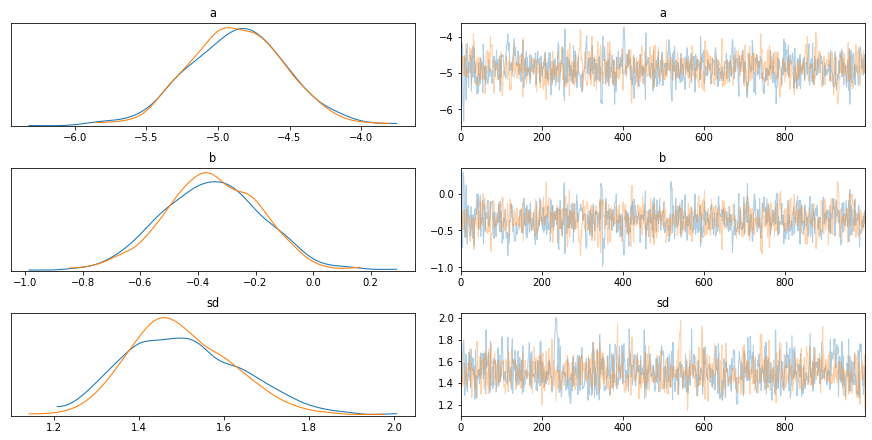

In [193]:
az.plot_trace(trace_m7_h4c, var_names=["~mu"]);

In [194]:
az.summary(trace_m7_h4d, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
a,-1.80,2.07,-4.95,1.68
b[0],-0.20,0.20,-0.53,0.11
b[1],-0.26,0.17,-0.51,0.04
sd,1.50,0.13,1.29,1.70


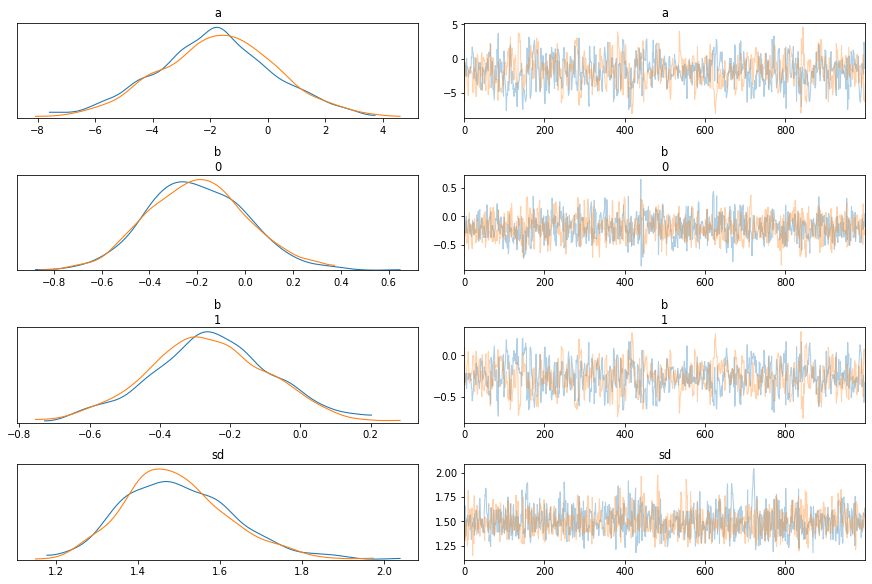

In [195]:
az.plot_trace(trace_m7_h4d, var_names=["~mu"]);

In [196]:
compare_df = az.compare({
    "m7_h4c": trace_m7_h4c,
    "m7_h4d": trace_m7_h4d,
})
compare_df

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m7_h4c,0,273.134,3.62147,0,0.540647,15.8429,0,True,deviance
m7_h4d,1,273.65,5.00641,0.516399,0.459353,15.4833,3.91444,True,deviance


3. Finally, evaluate the hypothesis that `mean.growing.season` and `sd.growing.season` interact to synergistically reduce language diversity. The idea is that, in nations with longer average growing seasons, high variance makes storage and redistribution even more important than it would otherwise. That way, people can cooperate to preserve and protect windfalls to be used during the droughts. These forces in turn may lead to greater social integreation and fewer languages

In [205]:
# Without area
with pm.Model() as m7_h4e:
    a = pm.Normal("a", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=2)
    mu = pm.Deterministic("mu", a + b[0] * d["sd.growing.season"] + b[1] * d["mean.growing.season"])
    sigma = pm.Uniform("sd", 0, 100)
    llang = pm.Normal("log(lang.per.cap)", mu=mu, sd=sigma, observed=d["log_lang_per_cap"])
    trace_m7_h4e = pm.sample(1000, tune=1000)

# Adding area
with pm.Model() as m7_h4f:
    a = pm.Normal("a", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=3)
    mu = pm.Deterministic("mu", a + b[0] * d["sd.growing.season"] + b[1] * d["mean.growing.season"] + b[2] * np.log(d["area"]))
    sigma = pm.Uniform("sd", 0, 100)
    llang = pm.Normal("log(lang.per.cap)", mu=mu, sd=sigma, observed=d["log_lang_per_cap"])
    trace_m7_h4f = pm.sample(1000, tune=1000)
    
# Adding weather_stations
with pm.Model() as m7_h4g:
    a = pm.Normal("a", mu=0, sd=100)
    b = pm.Normal("b", mu=0, sd=100, shape=4)
    mu = pm.Deterministic("mu", a + b[0] * d["sd.growing.season"] + b[1] * d["mean.growing.season"] + b[2] * np.log(d["area"]) + b[3] * d["num_stations_c"])
    sigma = pm.Uniform("sd", 0, 100)
    llang = pm.Normal("log(lang.per.cap)", mu=mu, sd=sigma, observed=d["log_lang_per_cap"])
    trace_m7_h4g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:04<00:00, 908.53draws/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a]
Sampling 2 chains, 1 divergences: 100%|██████████| 4000/4000 [00:14<00:00, 267.51draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a]
Sampling 2 chains, 0 divergences: 100%|██████████| 4000/4000 [00:18<00:00, 211.79draws/s]


In [200]:
az.summary(trace_m7_h4e, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
a,-6.05,0.47,-6.82,-5.31
b[0],-0.38,0.16,-0.63,-0.11
b[1],0.17,0.05,0.09,0.25
sd,1.40,0.12,1.21,1.57


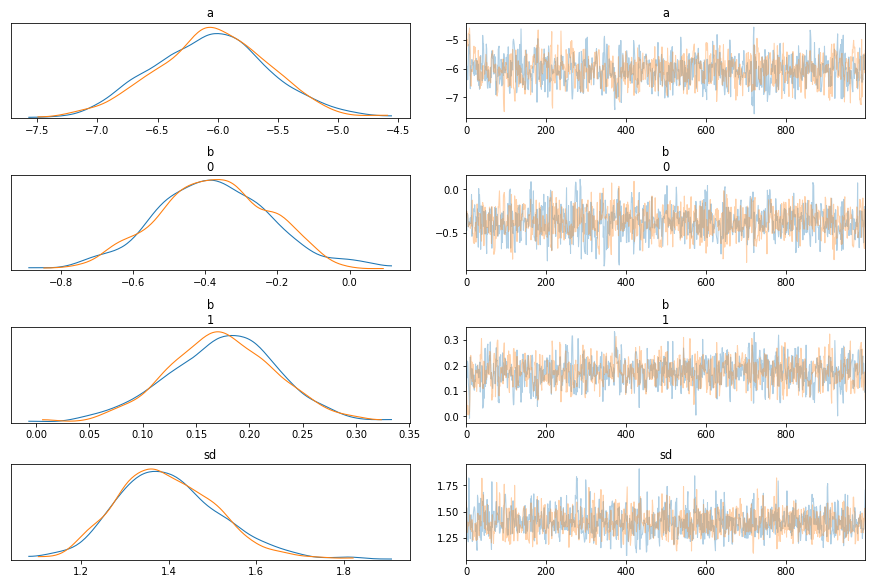

In [201]:
az.plot_trace(trace_m7_h4e, var_names=["~mu"]);

In [202]:
az.summary(trace_m7_h4f, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
a,-5.89,2.27,-9.38,-2.13
b[0],-0.36,0.20,-0.69,-0.08
b[1],0.18,0.06,0.08,0.27
b[2],-0.02,0.17,-0.29,0.26
sd,1.41,0.12,1.22,1.59


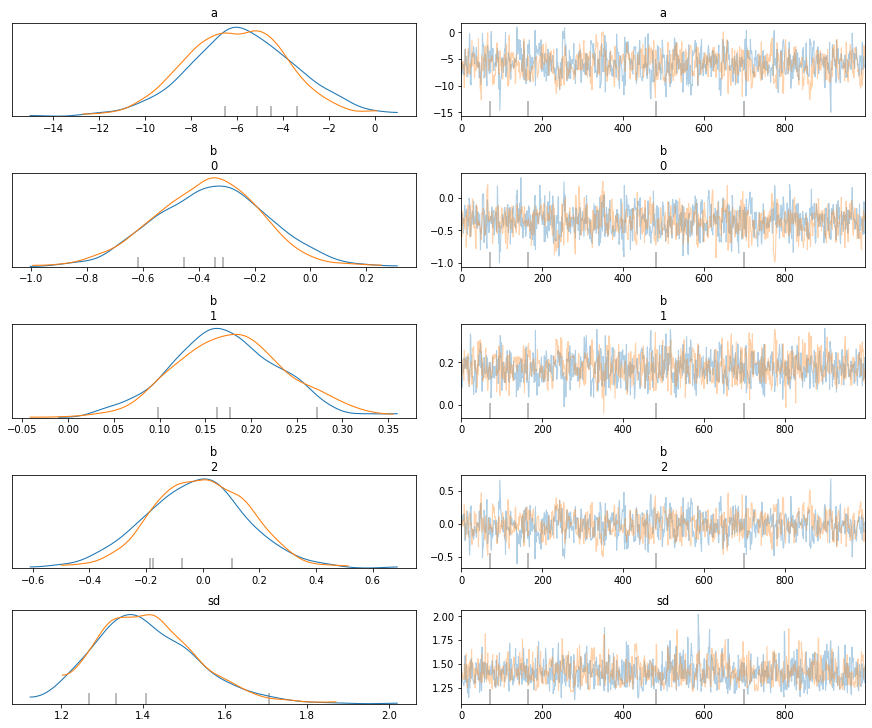

In [203]:
az.plot_trace(trace_m7_h4f, var_names=["~mu"]);

In [206]:
az.summary(trace_m7_h4g, var_names=["~mu"], credible_interval=0.89, kind="stats", round_to=2)

,mean,sd,hpd_5.5%,hpd_94.5%
a,-8.05,2.65,-12.31,-3.93
b[0],-0.25,0.20,-0.58,0.06
b[1],0.19,0.06,0.09,0.29
b[2],0.13,0.20,-0.17,0.46
b[3],-0.01,0.00,-0.02,-0.00
sd,1.39,0.11,1.20,1.56


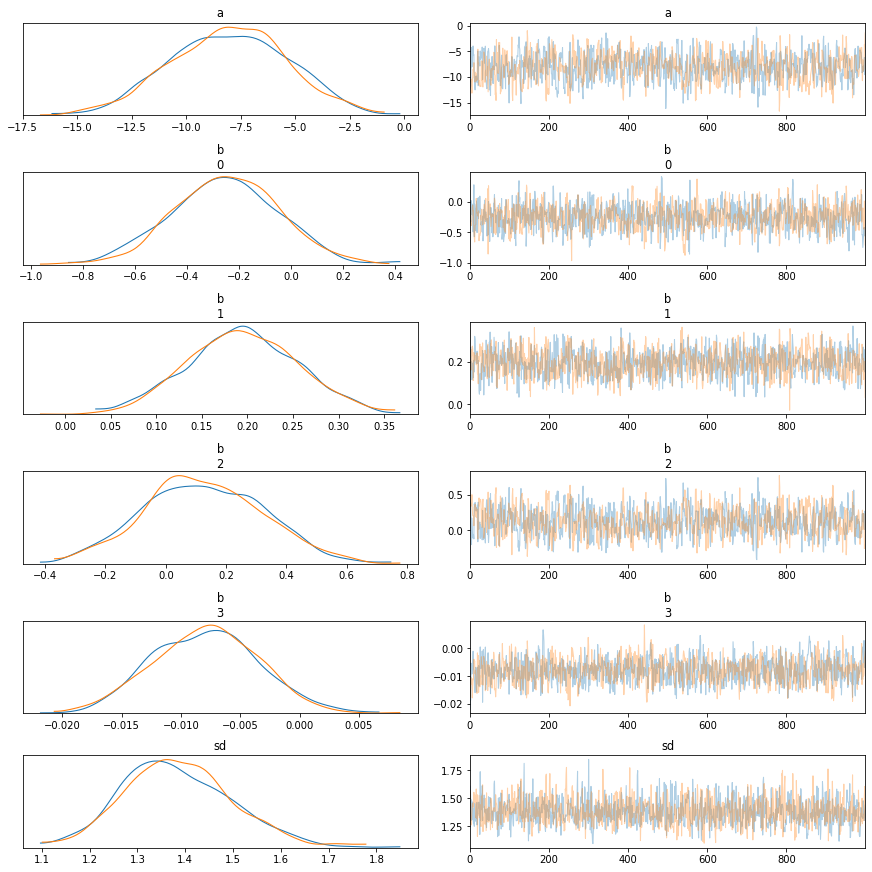

In [207]:
az.plot_trace(trace_m7_h4g, var_names=["~mu"]);

In [208]:
compare_df = az.compare({
    "m7_h4e": trace_m7_h4e,
    "m7_h4f": trace_m7_h4f,
    "m7_h4g": trace_m7_h4g,
})
compare_df

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m7_h4e,0,262.992,4.01139,0,0.529902,13.7449,0,True,deviance
m7_h4g,1,264.992,6.9375,1.99933,0.338133,14.0169,4.38446,True,deviance
m7_h4f,2,265.75,5.32737,2.75703,0.131965,14.8603,0.507866,True,deviance
